# House Price Assignment

Problem Statement : A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.

So, Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Goal : To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know,

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
* Determine the optimal value of lambda for ridge and lasso regression.

# Step 1 : Load and understand the Data, Data cleaning and visualization of Data

# SalePrice is the Target Variable

In [42]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

# import libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# Read the data
hp = pd.read_csv("train.csv")
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
hp.shape

# Overall there are 1460 rows and 81 colums

(1460, 81)

In [44]:
hp.info()

# Summary
## Overall there are 1460 entries
## We observe some of the columns have a large Null values. for ex: Alley,FireplaceQu,PoolQC,Fence, MiscFeature and 
## some have lesser Null values .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
hp.describe()

# Summary
## There seems to be outliers in some features - for ex: LotArea
## Some features have 0 for min, 25%, 50% and 75% ## Some features have 0 for min, 25%, 50% and 75% 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
# Fixing Rows and Columns : Check for all columns and decide on drop or Null value treatment based on data dictornary 

# Drop 'Id' column as it's just index
hp = hp.drop('Id', axis=1)

# Check for NaN Values
hp.isnull().sum()

# By cross referencing the NA values from the Data Dictionary , it seems NA actually represents some meaningfull information.
# So instead of dropping that columns we need to carefully IMPUTE the Missing Values/NA values

# 'LotFrontage' column means Linear feet of street connected to property. Typically most of the property will be connected to street
# So, for NA  we can either use 0 which means Property is not connected to street which typically may NOT be the case .
# So, we choose to impute all the NA values with the median() value which inturn DIDN'T impact the mean 
hp['LotFrontage'] = hp['LotFrontage'].fillna(hp['LotFrontage'].median())

# 'Alley' column value_counts shows there are 1369 NaN values which is represented by NA in Dataset .
# Actually NA represets "No Alley Access" which is a meaningfull information as per Data dictionary so we impute the NA values
# So we impute all NA values with No_Alley
hp['Alley'].value_counts(dropna=False)
hp['Alley'] = hp['Alley'].fillna("No_Alley")


# 'MasVnrType' column value_counts shows there are only 8 NaN values which is represent by NA in Dataset
# As the # of NA is very less (8/1460) we impute the missing value with mode value which means we update those missing values with "None". 
hp['MasVnrType'].value_counts(dropna=False)
hp['MasVnrType'] = hp['MasVnrType'].fillna("None")

# 'MasVnrArea' is related to above 'MasVnrType' column and needs to be imputed accordingly for the missing values (NA)
# Data impute from NA --> 0 for those 8 Nan Values
hp['MasVnrArea'].value_counts(dropna=False)
hp['MasVnrArea'] = hp['MasVnrArea'].fillna(0.0)

# For all the Basement features, we obserse NA is treated as NaN -Null values BUT based on Data Dictionary ,
# NA represents a meaningfull information that there is "No Basement"
# So, Data imputation is done for all Bsmt features which has NA --> No_Basement

Bsmt_list = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
hp[Bsmt_list] = hp[Bsmt_list].fillna("No_Basement")

# 'FireplaceQu' column value_counts shows there are 690 NaN values which are represented as NA in the dataset.
# Actually NA represents "No Fireplace"  which is a meaningfull information as per Data dictionary so we impute the NA values
# So we impute all NA values with "No_Fireplace"

hp['FireplaceQu'].value_counts(dropna=False)
hp['FireplaceQu'] = hp['FireplaceQu'].fillna("No_Fireplace")

# For all the Garage features, we observe NA is treated as NaN Null values BUT based on Data Dictionary ,
# NA represents a meaningfull information that there is "No Garage"
# So, Data imputation is done for all Garage features which has NA --> No_Garage

Garage_list = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
hp[Garage_list] = hp[Garage_list].fillna("No_Garage")

# We observe that GarageYrBlt is related to Garage_list above and for all NA mentioned in GarageYrBlt there is No_Garage feature.
# So, we impute all NA values to 0
hp['GarageYrBlt'] = hp['GarageYrBlt'].fillna(0)


# 'PoolQC' column value_counts shows there are 1453 NaN values which are represented as NA in dataset
# Actually NA represents "No Pool" which is a meaningfull information as per Data dictionary so we impute the NA values
# So we impute all NA values with "No_Pool"
hp['PoolQC'].value_counts(dropna=False)
hp['PoolQC'] = hp['PoolQC'].fillna("No_Pool")

# 'Fence' column value_counts shows there are 1179 NaN values which are represented as NA in dataset
# Actually NA represents "No Fence" which is a meaningfull information as per Data dictionary so we impute the NA values
# So we impute all NA values with "No_Fence"
hp['Fence'].value_counts(dropna=False)
hp['Fence'] = hp['Fence'].fillna("No_Fence")

# 'MiscFeature' column value_counts shows there are 1406 NaN values which are represented as NA in dataset
# Actually NA represents "None" which is a meaningfull information as per Data dictionary so we impute the NA values
# So we impute all NA values with "None"
hp['MiscFeature'].value_counts(dropna=False)
hp['MiscFeature'] = hp['MiscFeature'].fillna("None")

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

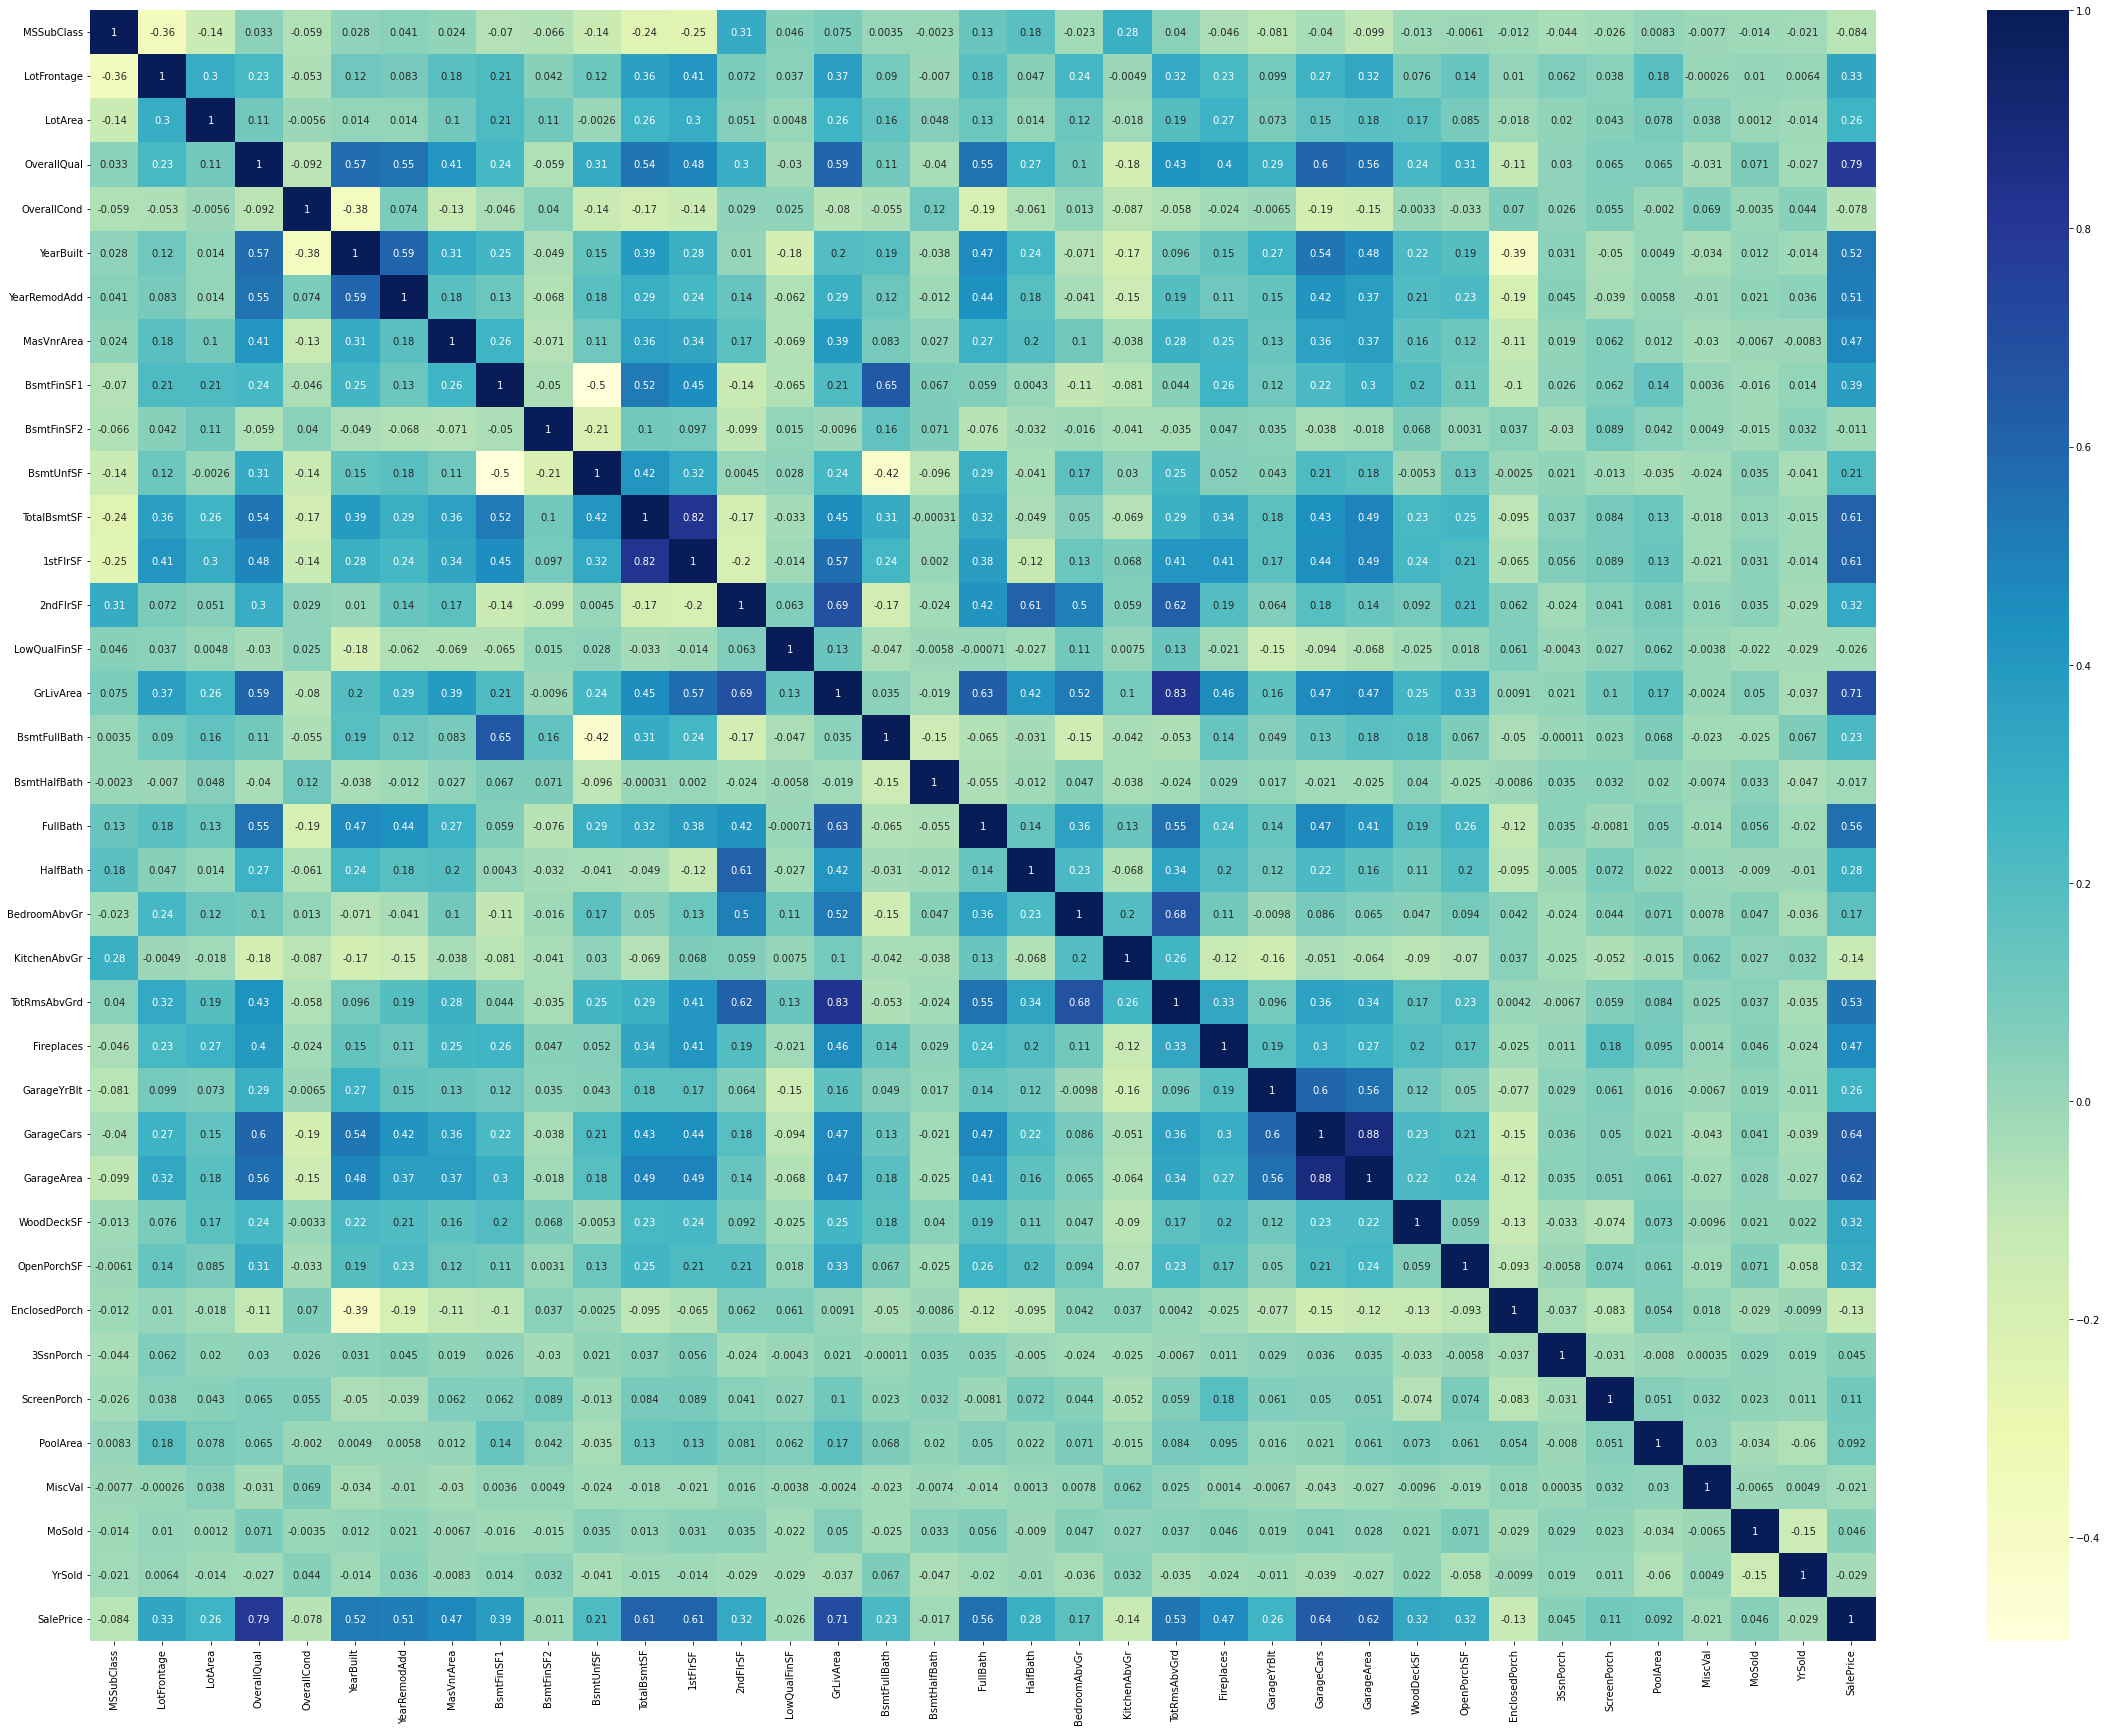

In [47]:
# Checking the correlation between Numerical features 

plt.figure(figsize=(40,30))
sns.heatmap(data=hp.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("hp_heatmap.pdf")
plt.show()

# Summary of heatmap detailed below

# Summary of Heatmap

## Correlation b/w Features : 
#### 1stFlrSF and TotalBsmtSF - 0.82 
#### TotRmsAbvGrd and GrLivArea - 0.83
#### GarageCars and GarageArea - 0.88 

## Correlation of Features V/s SalePrice (Target Variable)
### W.r.t SalePrice target variable we observe > +0.60 corelation with OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea.

## Due to above correlation b/w the features,
#### TotalBsmtSF and 1stFlrSF both has a same correlation (0.61) to SalePrice
#### GarageCars and GarageArea both has almost similar correlation (0.64/0.62) w.r.t SalePrice

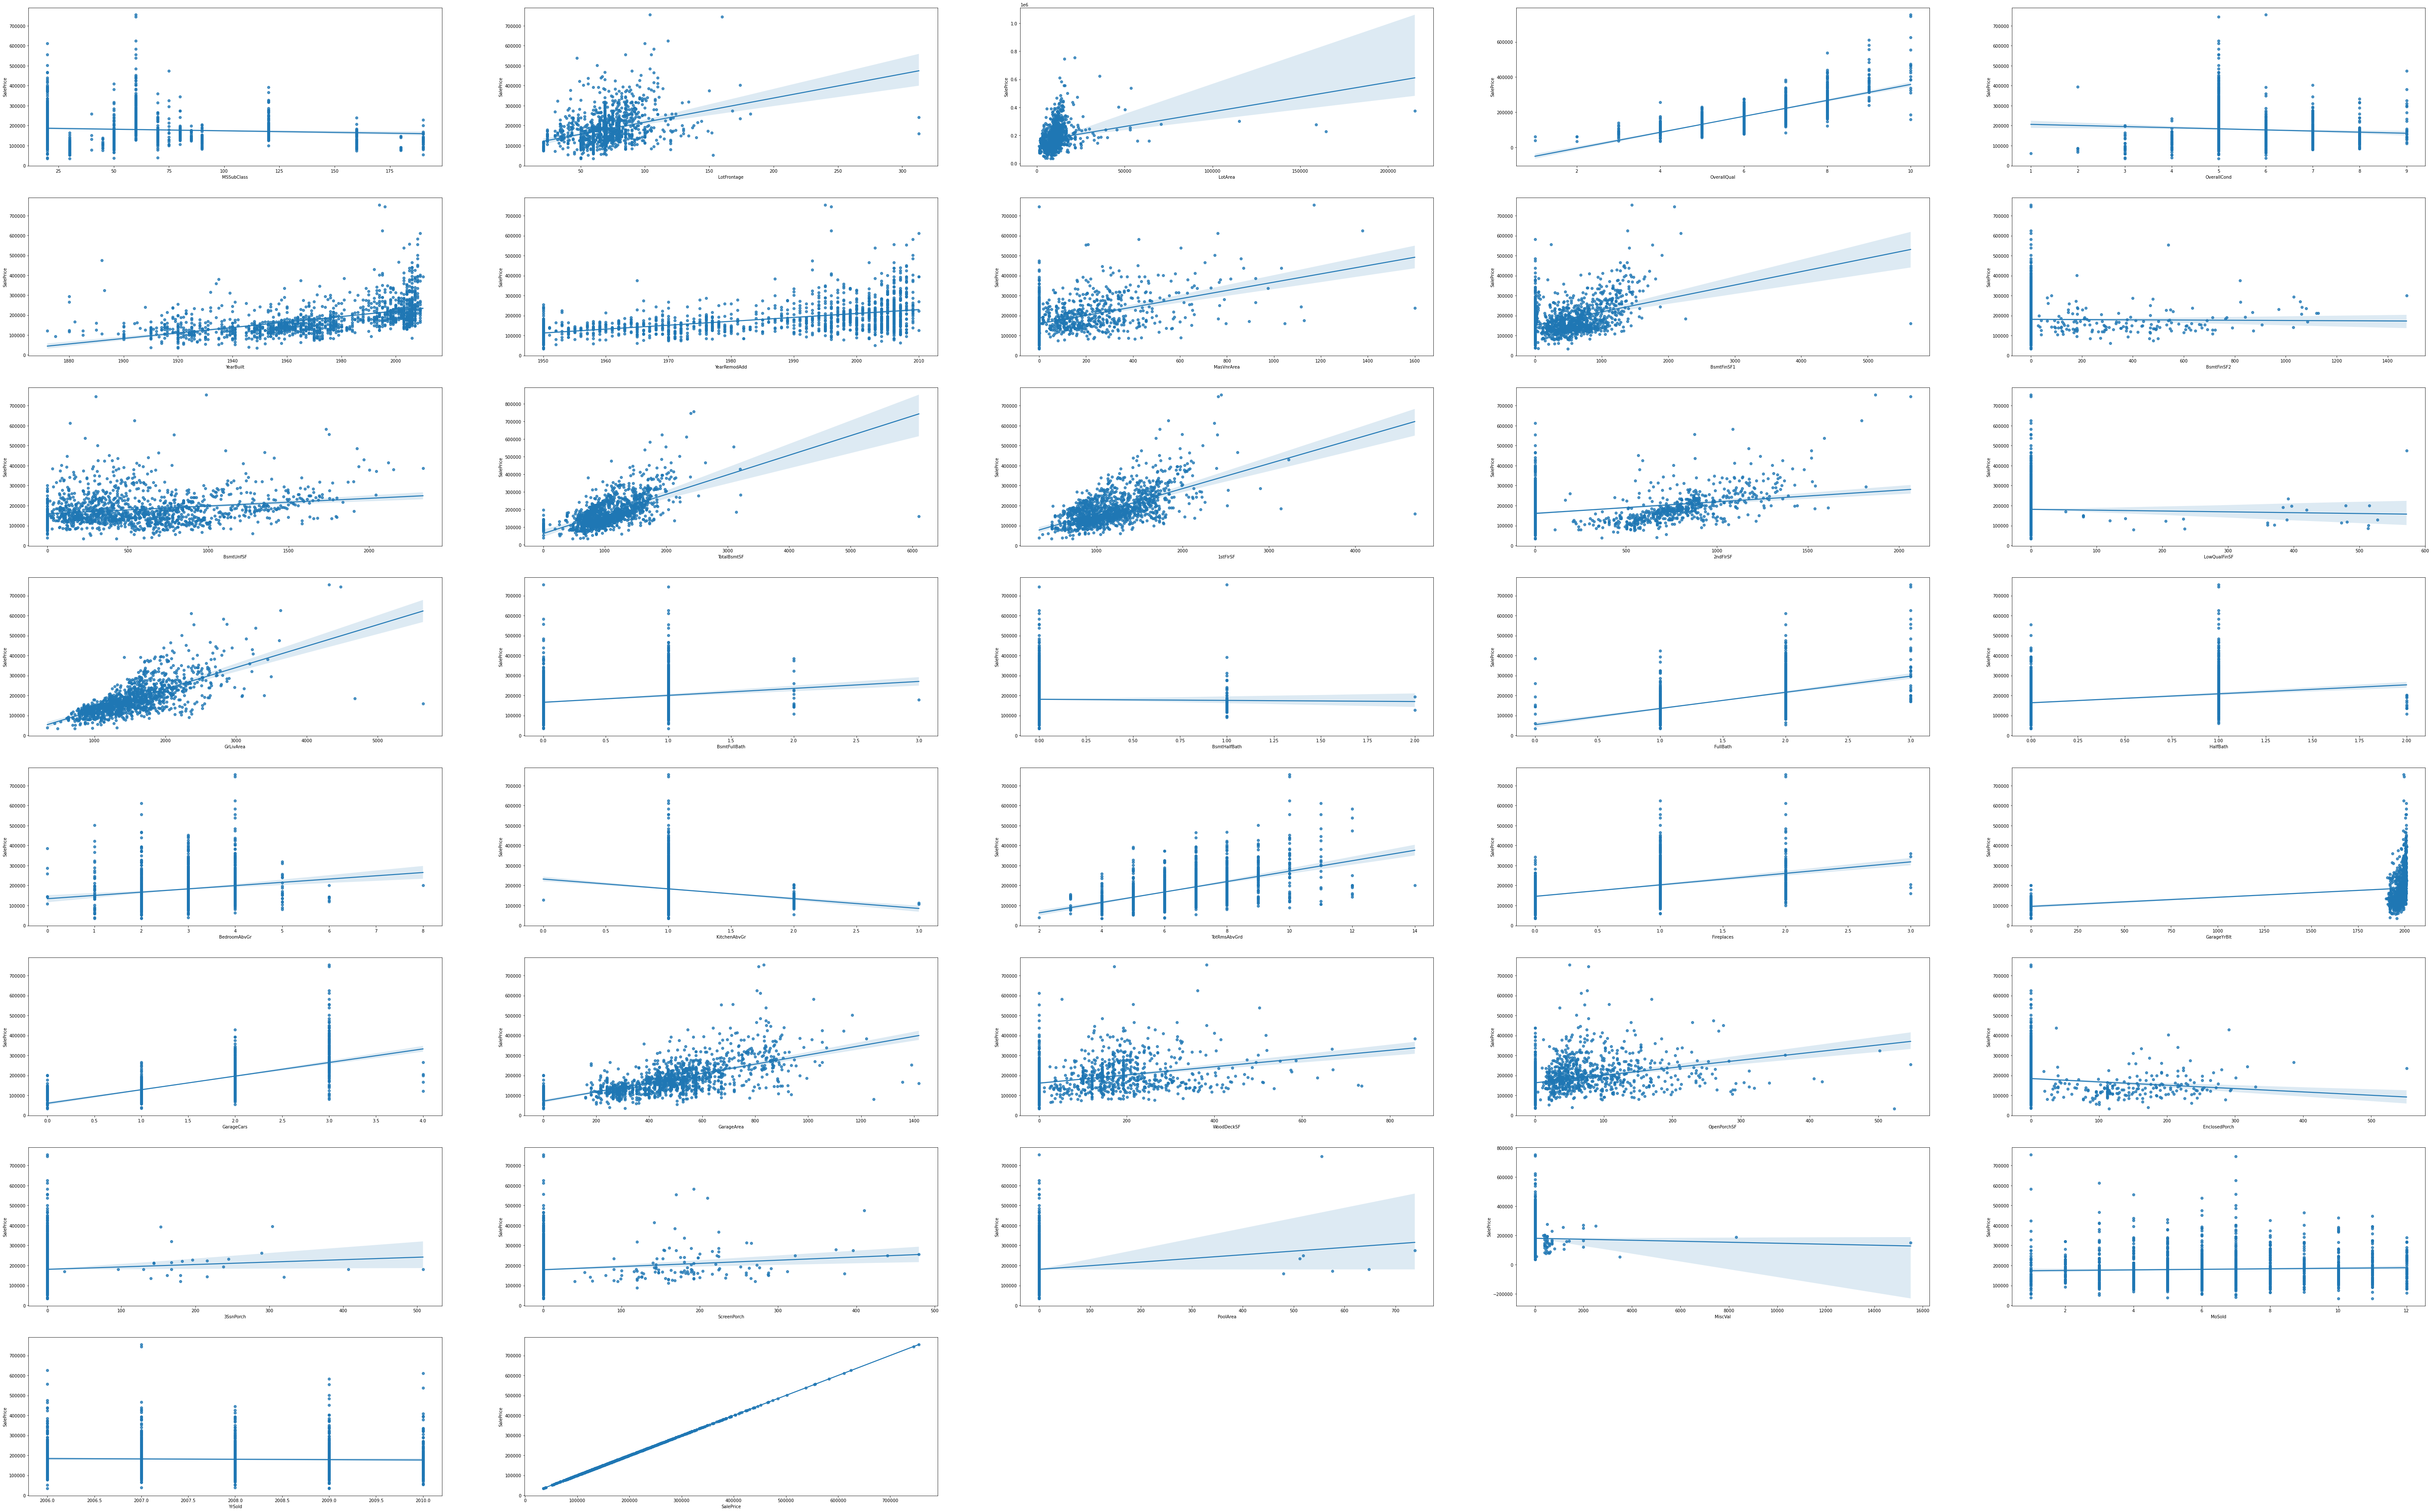

In [48]:
# Data Visualization to check linearity of features w.r.t SalePrice

#plt.figure(figsize=(500,500))
#sns.pairplot(x_vars=hp.columns, y_vars='SalePrice', data=hp)
#plt.savefig("hp_linearity.pdf")
#plt.show()

num_list = hp.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(100,80))
for num in range(len(num_list)):
    plt.subplot(10,5,num+1)
    sns.regplot(x=num_list[num], y='SalePrice', data=hp)

plt.savefig("hp_numeric_regplot.pdf")
plt.show()

# Please view the saved PDF for better understanding .

# Summary 
## Most of the features have discrete values 
## Some features show linearity with SalePrice - 1stFlrSF, GrLivArea, LotFrontage, GarageArea,TotalBsmtSF


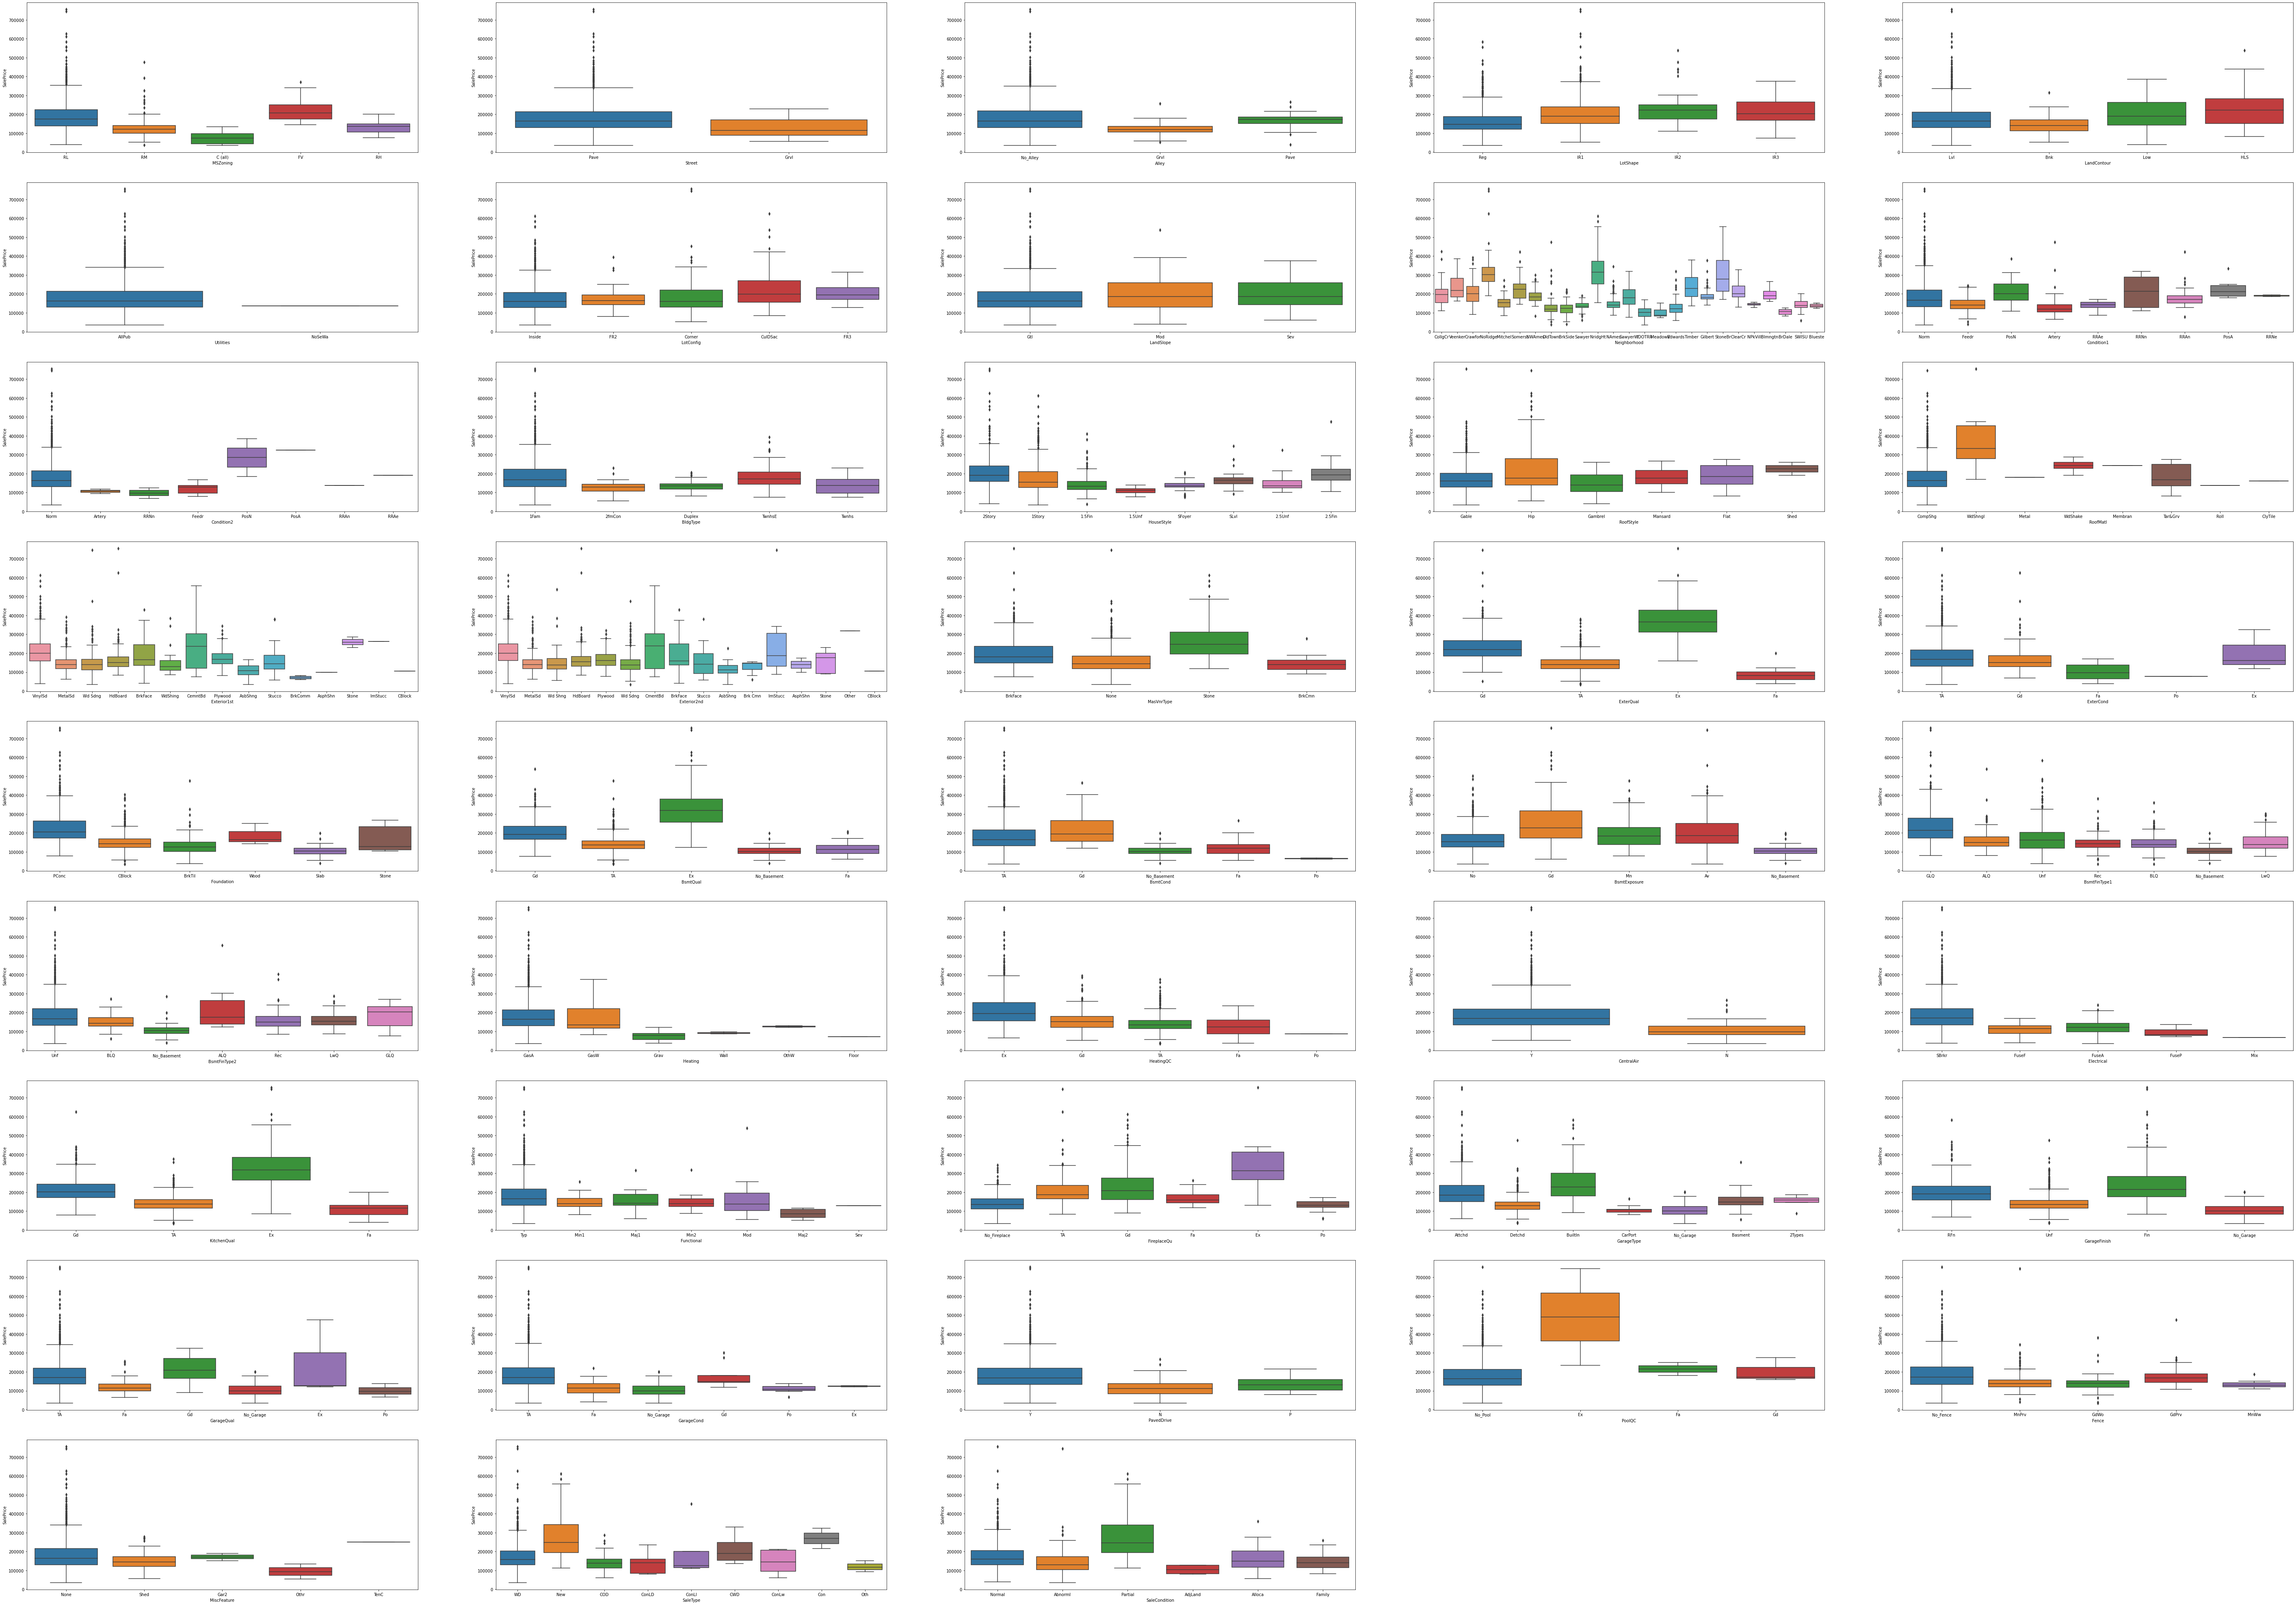

In [49]:
# Data Visualisation of Categorical data using boxplot V/s Saleprice

cat_list = hp.select_dtypes(include=['object']).columns

plt.figure(figsize=(100,80))
for num in range(len(cat_list)):
    plt.subplot(10,5,num+1)
    sns.boxplot(x=cat_list[num], y='SalePrice', data=hp)

plt.savefig("hp_categorical_boxplot.pdf")
plt.show()

# Summary for each Categorical Feature V/s SalePrice

## Utilities - all the entries in this column are shown as "AllPub" and only 1 entry shows "NoSeWa". As it has same Data throughout the column so we can drop Utilities columns.
## MSZoning - Although Highest house price is observed for RL (Residential Low density) BUT observed Higher Inter quartile Range and higher median House Price for FV (Floating Village Residential)
## Street - Higher median House price for Paved Road access to property
## Alley - Data shows that majority of houses are without Alley (No Alley) and due to this House Price is higher and also the range b/w min-Max pricing. .
###        having said that, Minimum House price is higher if house has Paved alley access and also the median price is almost similar to No Alley
## LotConfig - Higher median and Max house price with Cul-de-sac .i.e. if a street or passage closed at one end adjacent to House
## LandSlope  - Interesting to see Higher house prices for property with Moderate and Severe slope this means higher prices for properties in Hill top.
## landContour - properties in HSL - Hillside has higher price
## Condition1 and Condition2 - Top 3 driver of Higher house price are,
###        PosN - Near postive off-site feature- Park, greenbelt . etc
###        PosA - Adjacent to Positive off-site feature
###        RRNn (Condition1) - within 200' of North South Railroad
## LotShape - Higher House prices are observed for Moderately Irregular and Irregular shape of property
## Neighborhood - Properties in Stone Brook, North Ridge Heights and NorthRidge have higher House price.
## BldgType - 1Fam -Single Family Detached and TwnhsE - Townhouse End Unit has higher house price
## HouseStyle - One Story and 2 Story style of dwelling has higher price and Lower price for 1.5 story with 2nd level unfinished.
## RoofStyle - Higher max price and price range for Hip styled roof BUT higher min price for Shed styled roof
## Exterior1st and Exterior2nd - Higher median and Higher price range for Cement Board exterior covering on house .
## MasVnrType - Higher price for Stone Masonry veener type
## ExterQual - Property price is higher which use Excellent quality of material on the exterior 
## ExterCond - Higher price for present Execllent condition of the exterior material . Also there is a chance of price Negotiations for Average/Typical condition due to price range
## Foundation - Poured Contrete has higher house price.
## BsmtQual and BsmtCond - Higher property price for Execllent 100+ inches height of the basement and minimum Good condition of basement
## GarageType - Built-in garage type fetches higher price
## KitchenQual, FireplaceQu, GarageQual and PoolQC  - Excellent Kitchen Quality, Firepalce Quality, Garage Quality and Pool Quality fetches higher house price
## SaleType and SaleCondition - Newly constructed house and even under-construction houses fetches higher price

In [50]:
# Drop Features based on Correlation matix and usefulness of the data 
# 1stFlrSF and TotalBsmtSF are 0.82 corelated ==> Although they are related BUT they are 2 different features so let's keep them and use RFE to eliminate 
# TotRmsAbvGrd and GrLivArea are 0.83 corelated ==> GrLivArea provides Above Grade living area square feet which is better feature than TotRmsAbvGrd: Total rooms above grade       
# GarageCars and GarageArea are 0.88 corelated ==> GarageArea is a better indicator as compared to GarageCars
## Utilities - all the entries in this column are shown as "AllPub" and only 1 entry shows "NoSeWa". As it has same Data throughout the column so we can drop Utilities columns.

hp = hp.drop('GarageCars', axis=1)
hp = hp.drop('Utilities', axis=1)
hp = hp.drop('TotRmsAbvGrd', axis=1)

In [51]:
# Encoding Ordinal Categorical variables 

# Basically convert all the oridnal variables which has a natural order to Numbers
# Poor - 0, Fair - 1, Average/Typical - 2, Good - 3 , Excellent - 4

hp['ExterQual'] = hp['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
hp['ExterCond'] = hp['ExterCond'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

hp['BsmtQual'] = hp['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Basement':0})
hp['BsmtCond'] = hp['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Basement':0})

hp['BsmtExposure'] = hp['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'No_Basement':0})

hp['BsmtFinType1'] = hp['BsmtFinType1'].map({ 'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2,'Unf':1 ,'No_Basement':0})
hp['BsmtFinType2'] = hp['BsmtFinType2'].map({ 'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2,'Unf':1 ,'No_Basement':0})

hp['HeatingQC'] = hp['HeatingQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

hp['CentralAir'] = hp['CentralAir'].map({'Y':1, 'N':0}) 

hp['KitchenQual'] = hp['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

hp['FireplaceQu'] = hp['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Fireplace':0})

hp['GarageQual'] = hp['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Garage':0})
hp['GarageCond'] = hp['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Garage':0})
hp['PoolQC'] = hp['PoolQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No_Pool':0})

hp.shape

(1460, 77)

In [52]:
# Dummy Variable creation for Nominal Categorical variables

# Get the list of Nominal Categorical variables
unorder_category_list = hp.select_dtypes(include=['object'])

# Create dummy variables for each Categorical variable and drop_first 
unorder_category = pd.get_dummies(unorder_category_list, drop_first=True)

# print the dummy variables list
unorder_category

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Drop Original Categorical variable before creating dummy variables
hp = hp.drop(list(unorder_category_list.columns), axis=1)

# After dropping the original categorical variable of 28 , hp.shape is now reduced to 49 from 77.
hp.shape

(1460, 49)

In [54]:
# Now, concat the newly created Dummy variables to hp dataframe
hp = pd.concat([hp,unorder_category], axis=1)

# After Concat the dummy variables of 165 , hp.shape is now 214 from 49 i.e. (49+165)
hp.shape

(1460, 214)

In [55]:
# All variables are numeric 

hp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(46), uint8(165)
memory usage: 794.3 KB


# Split Train and test dataset and Variable Scaling

In [56]:
# Split Train and Test Dataset . As the dataset has 1460 entries , would like to split Train/Test - 70/30 ratio 
hp_train, hp_test = train_test_split(hp, train_size=0.7, random_state=100)

# Create Feature_list with Column names which are non-binary .i.e. Columns which are not having 0 and 1.
# After checking uint8 dtypes are all having binary numbers so we choose float64 and int64 dtypes columns
Feature_list = hp_train.select_dtypes(include=['float64', 'int64']).columns

# Rescaling the Features 
# Initiate the Scaler Object for MinMaxscaler() and scale train and test dataset
scaler = MinMaxScaler()
hp_train[Feature_list] = scaler.fit_transform(hp_train[Feature_list])
hp_test[Feature_list] = scaler.transform(hp_test[Feature_list])

# Divide the Dataset to X and Y sets for Model Building

In [57]:
# Divide X and Y dataset

y_train = hp_train.pop('SalePrice')
X_train = hp_train

y_test = hp_test.pop('SalePrice')
X_test = hp_test

# Now we have 213 features which is a large value so we can use RFE method to determine N features which can be used for further Model Building

# Obviously we don't know the N value so we will build multiple linear regression model to determine the N features

# With multiple models , we need to choose the better model based on Adjusted R2 value and choose that N features

# We will experiment with N = 40, 45, 50, 55, 60, 70

# ==> Model 1 -  RFE with N = 40

In [58]:
# Model 1 - Run RFE with N = 40

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 40)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref1 variable to have the list of Columns
X_train_ref1 = X_train.columns[rfe.support_]

# Use above X_train_ref1 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref1]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:27   Log-Likelihood:                 2037.4
No. Observations:                1021   AIC:                            -3993.
Df Residuals:                     980   BIC:                            -3791.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2741 

# ==> Model 2 - RFE with N = 45

In [59]:
# Model 2 - Run RFE with N = 45 

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 45)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref2 variable to have the list of Columns
X_train_ref2 = X_train.columns[rfe.support_]

# Use above X_train_ref2 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref2]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:28   Log-Likelihood:                 2060.6
No. Observations:                1021   AIC:                            -4029.
Df Residuals:                     975   BIC:                            -3802.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2865 

# ==> Model 3 - RFE with N = 50

In [60]:
# Model 3 - Run RFE with N = 50

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 50)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref3 variable to have the list of Columns
X_train_ref3 = X_train.columns[rfe.support_]

# Use above X_train_ref3 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref3]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:28   Log-Likelihood:                 2067.9
No. Observations:                1021   AIC:                            -4038.
Df Residuals:                     972   BIC:                            -3796.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.28

# ==> Model 4 - RFE with N = 55

In [61]:
# Model 4 - Run RFE with N = 55

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 60)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref4 variable to have the list of Columns
X_train_ref4 = X_train.columns[rfe.support_]

# Use above X_train_ref4 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref4]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

#hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:29   Log-Likelihood:                 2067.9
No. Observations:                1021   AIC:                            -4038.
Df Residuals:                     972   BIC:                            -3796.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.28

# ==> Model 5 - RFE with N = 60

In [62]:
# Model  5 - Run RFE with N = 60

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 60)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref5 variable to have the list of Columns
X_train_ref5 = X_train.columns[rfe.support_]

# Use above X_train_ref5 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref5]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

#hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:30   Log-Likelihood:                 2067.9
No. Observations:                1021   AIC:                            -4038.
Df Residuals:                     972   BIC:                            -3796.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.28

# ==> Model 6 - RFE with N = 70

In [63]:
# Model 6 - Run RFE with N = 70

hp_lm = LinearRegression()
hp_lm.fit(X_train, y_train)

rfe = RFE(hp_lm, 70)
rfe = rfe.fit(X_train, y_train)

# dump the list of columns, RFE recommendation, RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Copy the RFE recommended columns to X_train_ref6 variable to have the list of Columns
X_train_ref6 = X_train.columns[rfe.support_]

# Use above X_train_ref6 list of columns and copy only that dataset from those columns to X_train_rfe1
X_train_rfe1 = X_train[X_train_ref6]

# Build a OLS Model with above RFE recommended variables
X_train_sm1 = sm.add_constant(X_train_rfe1)

#hp_lm1 = sm.OLS(y_train, X_train_sm1)
hp_lm1_mode1 = hp_lm1.fit()

print(hp_lm1_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:31   Log-Likelihood:                 2067.9
No. Observations:                1021   AIC:                            -4038.
Df Residuals:                     972   BIC:                            -3796.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.28

# Summary of Different Model with different RFE values
## We compare Adjusted R2 Value to choose the better model thus RFE recommended variables.
## Out of 6 OLS models built -Adjusted R2 value of Model with RFE N = 50 (0.911) is better than Model with RFE N = 45 (0.910)
## Other models with RFE N = 55, 60, 70 all have same Adjusted R2 values (0.911) as Model with RFE N =50 (0.911)

# Conclusion
## ==> we choose Features recommended by RFE N=50 : Model 3 (X_train_ref3) for further building regularization models

# Create X_train_rfe, X_test_rfe using X_train_ref3 (N=50)

In [64]:
X_train_rfe = X_train[X_train_ref3]
X_test_rfe = X_test[X_train_ref3]
X_train_ref3

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageArea', 'PoolArea', 'MiscVal', 'Street_Pave',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'Heating_OthW',
       'Heating_Wall', 'Functional_Mod', 'Functional_Sev',
       'GarageType_No_Garage', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

# Let's build Ridge and Lasso Regression Model

# ==> Ridge Regression

In [65]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                   0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20.0, 30.0, 50.0, 80.0, 100.0, 500.0, 1000.0]}

# Create an object
ridge = Ridge()

# Cross Validation 
folds = 6

# Ridge Regression
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid = params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_rfe, y_train)

Fitting 6 folds for each of 31 candidates, totalling 186 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 30.0, 50.0, 80.0, 100.0, 500.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Print the best Hyperparameter alpha for Ridge Regression

print(model_cv.best_params_)

{'alpha': 0.6}


In [67]:
# Fitting Ridge Model for alpha = 0.6 and printing the coefficients which have been penalised

alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

# Print the coefficients 
print(ridge.coef_)

[-0.0538939  -0.02539978  0.11778525  0.14858167  0.06589054  0.05735909
  0.0304156   0.04611939  0.05461345 -0.0407631   0.04616141  0.08901281
  0.02498069  0.00906265  0.1808777   0.09009664 -0.01011341  0.18490254
 -0.02606985 -0.0114221   0.06389645 -0.02342152  0.00304185  0.02684283
  0.03977377  0.06866611  0.05295481  0.04238304 -0.29941272  0.13249099
  0.10545218  0.1010143   0.07577558  0.11642204  0.09536717  0.21498577
 -0.021777    0.03429046 -0.0514245   0.0366268  -0.01642909 -0.07061636
  0.01632693  0.00562507  0.02650961  0.00333598  0.05419306  0.03264412
  0.01040207  0.01040207]


In [68]:
# print Intercept
print(ridge.intercept_)

-0.28253222201297556


In [69]:
# Calculate metrics such as R2 score, RMSE 
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metrics=[]

r2_train_r = r2_score(y_train, y_pred_train)
metrics.append(r2_train_r)

r2_test_r = r2_score(y_test, y_pred_test)
metrics.append(r2_test_r)

mse_train_r = mean_squared_error(y_train, y_pred_train)
metrics.append(np.sqrt(mse_train_r))

mse_test_r = mean_squared_error(y_test, y_pred_test)
metrics.append(np.sqrt(mse_test_r))

metrics

[0.8717663857389981,
 0.8547549145119415,
 0.03931595025937328,
 0.04246103832050107]

# ==> Lasso Regression

In [70]:
# Create an object
lasso = Lasso()

# Lasso Regression
model_cv = GridSearchCV(estimator=lasso,
                        param_grid = params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_rfe, y_train)

Fitting 6 folds for each of 31 candidates, totalling 186 fits


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.08, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 30.0, 50.0, 80.0, 100.0, 500.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [72]:
alpha = 0.0001

lasso = Lasso(alpha = alpha)

lasso.fit(X_train_rfe, y_train)

print(lasso.coef_)

[-0.05180731 -0.00746209  0.09177458  0.15627476  0.05809075  0.05988196
  0.02473262  0.04831997  0.04181388 -0.02713078  0.04929224  0.07249504
  0.01280037 -0.          0.00818496  0.         -0.01790705  0.40264312
 -0.02315137 -0.00195113  0.05190756 -0.01302848 -0.          0.00107788
  0.03712769  0.06808616  0.05293085  0.03595887 -0.37003617  0.04618763
  0.          0.          0.          0.01385122  0.          0.14122707
  0.          0.01523812 -0.          0.00812119 -0.         -0.
  0.00762991  0.          0.         -0.00079464  0.0188006   0.00828685
  0.01901763  0.        ]


In [73]:
# print Intercept
print(lasso.intercept_)

-0.1634987729374597


In [74]:
# Calculate metrics such as R2 score, RMSE 
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metrics1=[]

r2_train_r = r2_score(y_train, y_pred_train)
metrics1.append(r2_train_r)

r2_test_r = r2_score(y_test, y_pred_test)
metrics1.append(r2_test_r)

mse_train_r = mean_squared_error(y_train, y_pred_train)
metrics1.append(np.sqrt(mse_train_r))

mse_test_r = mean_squared_error(y_test, y_pred_test)
metrics1.append(np.sqrt(mse_test_r))

metrics1

[0.8609481670945432,
 0.8461708658416498,
 0.04094078771408868,
 0.04369776094806514]

# Compare Rigde and Lasso Regression R2 Train/Test and RMSE values .
# Also print the alpha from Ridge and Lasso regression got from GridSearchCV

In [75]:
metrics_list = ['R2 (Train)', 'R2 (Test)', 'RMSE (Train)', 'RMSE (Test)']

print(' ===== Ridge Regression (alpha = 0.6) =====')
list(zip(metrics_list, metrics))

 ===== Ridge Regression (alpha = 0.6) =====


[('R2 (Train)', 0.8717663857389981),
 ('R2 (Test)', 0.8547549145119415),
 ('RMSE (Train)', 0.03931595025937328),
 ('RMSE (Test)', 0.04246103832050107)]

In [76]:
print(' ===== Lasso Regression (alpha = 0.0001) =====')
list(zip(metrics_list, metrics1))

 ===== Lasso Regression (alpha = 0.0001) =====


[('R2 (Train)', 0.8609481670945432),
 ('R2 (Test)', 0.8461708658416498),
 ('RMSE (Train)', 0.04094078771408868),
 ('RMSE (Test)', 0.04369776094806514)]

# ==> Summary of Ridge and Lasso Regression

# Ridge Regression Model - Observed R2 score of 0.871 for train dataset and 0.854 for test dataset which means this model explained about 85.4% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

# Lasso Regression Model - Observed R2 score of 0.860 for train dataset and 0.846 for test dataset which means this model explained about 84.6% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

# Now, As we observe for both the models, R2 Scores of Train and Test dataset are decent.
# To decide on the Final Model we will consider "BETTER" R2 Scores on the test dataset
# As we see, R2 Score of Test dataset for Ridge Regression model (0.8547) is better than Lasso Regression Model (0.8461) 

# ===  We choose Ridge Regression model as our Final model ===

In [77]:
# Create DataFrame to dump Model Coeffeicents from Ridge and lasso regression

model_coeff = pd.DataFrame(index=X_train_rfe.columns)
model_coeff.rows = X_train_rfe.columns

model_coeff['Ridge (alpha = 0.6)'] = ridge.coef_
model_coeff['Lasso (alpha = 0.0001)'] = lasso.coef_

model_coeff

,Ridge (alpha = 0.6),Lasso (alpha = 0.0001)
MSSubClass,-0.053894,-0.051807
LotFrontage,-0.025400,-0.007462
LotArea,0.117785,0.091775
OverallQual,0.148582,0.156275
OverallCond,0.065891,0.058091
YearBuilt,0.057359,0.059882
MasVnrArea,0.030416,0.024733
ExterQual,0.046119,0.048320
BsmtQual,0.054613,0.041814
BsmtCond,-0.040763,-0.027131


# ==> Summary of Ridge and Lasso Regression

# Ridge Regression Model - Observed R2 score of 0.871 for train dataset and 0.854 for test dataset which means this model explained about 85.4% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

# Lasso Regression Model - Observed R2 score of 0.860 for train dataset and 0.846 for test dataset which means this model explained about 84.6% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

# Now, As we observe for both the models, R2 Scores of Train and Test dataset are decent.
# To decide on the Final Model we will consider "BETTER" R2 Scores on the test dataset
# As we see, R2 Score of Test dataset for Ridge Regression model (0.8547) is better than Lasso Regression Model (0.8461)

# === We choose Ridge Regression model as our Final model ===

In [78]:
# Ridge coeff dump
Ridge_coeff = model_coeff[['Ridge (alpha = 0.6)']]
Ridge_coeff.sort_values(by='Ridge (alpha = 0.6)', ascending = False)

,Ridge (alpha = 0.6)
RoofMatl_WdShngl,0.214986
GrLivArea,0.184903
1stFlrSF,0.180878
OverallQual,0.148582
RoofMatl_CompShg,0.132491
LotArea,0.117785
RoofMatl_Tar&Grv,0.116422
RoofMatl_Membran,0.105452
RoofMatl_Metal,0.101014
RoofMatl_WdShake,0.095367


#  Ridge Regression model top 20 Features affecting SalePrice Positively 

In [79]:
# Ridge Regression model top 20 Features affecting SalePrice Positively
Ridge_coeff.sort_values(by='Ridge (alpha = 0.6)', ascending = False).head(20)

,Ridge (alpha = 0.6)
RoofMatl_WdShngl,0.214986
GrLivArea,0.184903
1stFlrSF,0.180878
OverallQual,0.148582
RoofMatl_CompShg,0.132491
LotArea,0.117785
RoofMatl_Tar&Grv,0.116422
RoofMatl_Membran,0.105452
RoofMatl_Metal,0.101014
RoofMatl_WdShake,0.095367


# Ridge Regression model top 10 Features affecting SalePrice Negatively

In [80]:
# Ridge Regression model top 10 Features affecting SalePrice Negatively
Ridge_coeff.sort_values(by='Ridge (alpha = 0.6)', ascending = False).tail(10)

,Ridge (alpha = 0.6)
Functional_Mod,-0.016429
Exterior1st_CemntBd,-0.021777
PoolArea,-0.023422
LotFrontage,-0.025400
BedroomAbvGr,-0.026070
BsmtCond,-0.040763
Heating_OthW,-0.051424
MSSubClass,-0.053894
Functional_Sev,-0.070616
Condition2_PosN,-0.299413


# Overall Summary of House Price model with regression model using regularization .

In [81]:
# Top 50 features were selected by building multiple models with different RFE N values - 40, 45, 50, 55, 60, 70
## Decision was mde based on better Adjusted R2 value
## Out of 6 OLS models built -Adjusted R2 value of Model with RFE N = 50 (0.911) is better than Model with RFE N = 45 (0.910)
## Other models with RFE N = 55, 60, 70 all have same Adjusted R2 values (0.911) as Model with RFE N =50 (0.911)
## ==> 50 features selected were,  
#Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
#       'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
#       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
#       'GarageArea', 'PoolArea', 'MiscVal', 'Street_Pave',
#       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
#       'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_CompShg',
#       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
#       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
#       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'Heating_OthW',
#       'Heating_Wall', 'Functional_Mod', 'Functional_Sev',
#       'GarageType_No_Garage', 'MiscFeature_None', 'MiscFeature_Othr',
#       'MiscFeature_Shed', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
#       'SaleCondition_Partial'],
#      dtype='object')

# Based on above 50 features Ridge and Lasso Regression Models were built and Hyperparameter tuning was done using GridSearchCV 
# along with Cross Validation .
## Did multiple trials with different Folds value - 4,5,6,7 and the best results w.r.t R2 score and RMSE values for both Ridge 
## and Lasso Model was found with folds = 6

# ==> So, folds = 6 was set and used to run GridSearchCV to determine the alpha value .
## For Ridge Regression model - alpha = 0.6
## For lasso Regression model - alpha = 0.0001

# ==> To determine the better model we compared R2 Score and RMSE values for both models for Train and test dataset .

## Ridge Regression Model - Observed R2 score of 0.871 for train dataset and 0.854 for test dataset which means this model 
## explained about 85.4% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

## Lasso Regression Model - Observed R2 score of 0.860 for train dataset and 0.846 for test dataset which means this model 
## explained about 84.6% of the variation in the TEST DATA . Also Train and Test R2 Scores are decent enough for this model.

## Now, As we observe for both the models, R2 Scores of Train and Test dataset are decent.

## To decide on the Final Model we will consider "BETTER" R2 Scores on the test dataset

## As we see, R2 Score of Test dataset for Ridge Regression model (0.8547) is better than Lasso Regression Model (0.8461)

## ==> We choose Ridge Regression model as our Final model ===

# ==> Features/variables significant in predicting house price are ,

## Ridge Regression model top 15 Features affecting SalePrice Positively
#Index(['RoofMatl_WdShngl', 'GrLivArea', '1stFlrSF', 'OverallQual',
#      'RoofMatl_CompShg', 'LotArea', 'RoofMatl_Tar&Grv', 'RoofMatl_Membran',
#       'RoofMatl_Metal', 'RoofMatl_WdShake', '2ndFlrSF', 'BsmtFinSF1',
#       'RoofMatl_Roll', 'Neighborhood_NoRidge', 'OverallCond', 'GarageArea',
#       'YearBuilt', 'BsmtQual', 'SaleType_Con', 'Neighborhood_NridgHt'],
#      dtype='object')
## Ridge Regression model top 10 Features affecting SalePrice Negatively
# Index(['Functional_Mod', 'Exterior1st_CemntBd', 'PoolArea', 'LotFrontage',
#       'BedroomAbvGr', 'BsmtCond', 'Heating_OthW', 'MSSubClass',
#       'Functional_Sev', 'Condition2_PosN'],
#      dtype='object')

# Goal of this House Pricing Assignment

1. Which variables are significant in predicting the price of a house ?

- Based on the Ridge and Lasso Regression Model analysis, Final model was choosen to be Ridge Regression model because of
better R2 Score on test dataset as compared to Lasso Regression model.
- Although Ridge Regression Models covers almost all the features and provides coefficients for all features which are 
pushed towards 0 , have compared the coeffcients for lasso also and we observe the features pattern w.r.t positive and negative
impact on SalePrice is similar in Ridge and Lasso regression model coefficients.

So, based on above analysis,

-Top 20 Variables affecting Positively on Price of House are, 
    'RoofMatl_WdShngl', 'GrLivArea', '1stFlrSF', 'OverallQual','RoofMatl_CompShg', 'LotArea', 'RoofMatl_Tar&Grv',
    'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_WdShake', '2ndFlrSF', 'BsmtFinSF1',
    'RoofMatl_Roll', 'Neighborhood_NoRidge', 'OverallCond', 'GarageArea',
    'YearBuilt', 'BsmtQual', 'SaleType_Con', 'Neighborhood_NridgHt'
- Top 10 Variables affecting Negatively on Price of House are,
    'Functional_Mod', 'Exterior1st_CemntBd', 'PoolArea', 'LotFrontage',
    'BedroomAbvGr', 'BsmtCond', 'Heating_OthW', 'MSSubClass',
    'Functional_Sev', 'Condition2_PosN'
    
2. How well those variables describe the price of a house ?

- For the Ridge Regression Model, based on R2 Score of Test dataset around 85.47% of the data variation is explained .
- Price of house is described as assuming Top 20 Positive impacting and 10 Negative impacting features. 
    For more details predicting, we have to use consider all the variables from Ridge_coeff (ridge.coef_)

Price of house = 

 RoofMatl_WdShngl * 0.214986 + GrLivArea * 0.184903 + 1stFlrSF * 0.180878 + OverallQual * 0.148582+ RoofMatl_CompShg*0.132491+
LotArea * 0.117785 + RoofMatl_Tar&Grv * 0.116422 + RoofMatl_Membran * 0.105452 + RoofMatl_Metal * 0.101014 + RoofMatl_WdShake * 0.095367 + 2ndFlrSF * 0.090097 + BsmtFinSF1 * 0.089013 + RoofMatl_Roll * 0.075776 + Neighborhood_NoRidge * 0.068666 + OverallCond * 0.065891 + GarageArea * 0.063896 + YearBuilt * 0.057359 + BsmtQual * 0.054613 + SaleType_Con * 0.054193 + Neighborhood_NridgHt * 0.052955 - Functional_Mod * 0.016429 - Exterior1st_CemntBd * 0.021777 - PoolArea * 0.023422 - LotFrontage * 0.025400 - BedroomAbvGr * 0.026070 - BsmtCond * 0.040763 - Heating_OthW * 0.051424 - MSSubClass * -0.053894 - Functional_Sev * 0.070616 - Condition2_PosN * 0.299413

This Means
- Postive Impact on House Price
    - House price is higher if it has Wood Shingles in the Roof > roof material with Standard (Composite) Shingle > Gravel & Tar Roof Material
    - Basically bigger house more price. More space in square feet for above grade living area, 1st Floor, 2nd Floor, Garage Area and lotArea. 
    - Best material used and finishing of house fetches higher price - OverallQual, BsmtQual
    - Buyer's prefer Sale type which has Contract 15% down payment and Regular Term .
    - Higher price in Northridge neighborhood locatily .
- Negative Impact on House Price
    - Lesser price for Houses which has "Second" (condition2 variable) proximity to near Positive off-site features = park, greenbelt etc .
    - Other worlds, lesser price if property has promixity to more than 1 near positive off-site features, which can also mean outside the city.
    - Lesser price Severly Damaged Home functionallity 
    - General condition of Basement doesn't matter much.
    - Older building will cost lesser (MSSubClass)
    - Lesser price if Type of heating is Hot water or steam heat other than gas
    - Bigger Pool Area fetches less price
    
3. Determine the optimal value of lambda for ridge and lasso regression.

- Optimal Value of Lambda for,

Ridge Regression is 0.6

lasso Regression is 0.0001